In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math


# Distribuição normal

In [6]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

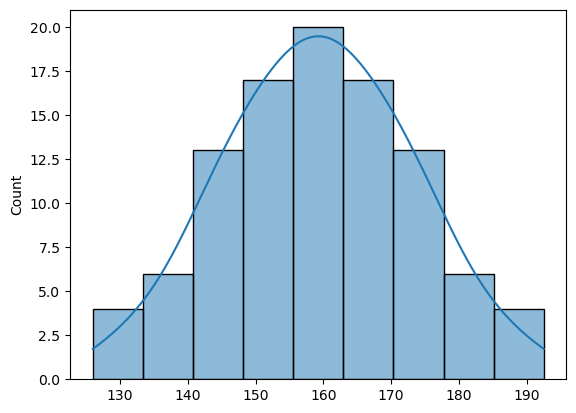

In [15]:
sns.histplot(dados, kde = 'True');

In [17]:
media = np.mean(dados)
desvio_padrao = np.std(dados)
media, desvio_padrao

(159.25, 13.65)

In [21]:
Q = np.quantile(dados,[0.25,0.50,0.75])
Q

array([150.5 , 159.25, 168.  ])

Qual a probabilidade de selecionar alguém em Q1

In [27]:
(Q[0] - media)/desvio_padrao

-0.641025641025641

In [43]:
0.26109

0.26109

In [45]:
stats.norm.cdf(Q[0], media, desvio_padrao)

0.26075301195608336

Qual a probabilidade de selecionar alguém em Q3

In [29]:
(Q[2] - media)/desvio_padrao

0.641025641025641

In [31]:
0.73891

0.73891

In [50]:
1 - 0.73891

0.26109000000000004

In [51]:
1 - stats.norm.cdf(Q[2], media, desvio_padrao) 

0.26075301195608336

In [49]:
stats.norm.sf(Q[2], media, desvio_padrao) 

0.26075301195608336

Qual a probabilidade de selecionar alguém entre Q2 e Q3

In [33]:
(Q[2] - media)/desvio_padrao

0.641025641025641

In [34]:
0.73891

0.73891

In [35]:
(Q[1] - media)/desvio_padrao

0.0

In [39]:
0.50

0.5

In [52]:
0.73891 - 0.50

0.23890999999999996

In [56]:
stats.norm.cdf(Q[2], media, desvio_padrao) - stats.norm.cdf(Q[1], media, desvio_padrao)

0.23924698804391664

Qual a probabilidade de selecionar alguém em Q1 ou Q3?

In [41]:
0.26109 + 0.26109

0.52218

Qual a probabilidade de NÃO selecionar alguém em Q1 ou Q3?

In [42]:
1 - 0.52218

0.47782

# Distribuição binomial 

Respostas sucesso ou fracasso e experimentos independentes

Exemplo: Jogando a moeda 10x, qual a probabilidade de obeter 5 'caras'?

In [4]:
n = 10
x = 5
p = 0.5

In [5]:
(math.factorial(n)) / (math.factorial(n-x) * math.factorial(x)) * math.pow(p,x) * math.pow(1 - p, n - x)

0.24609375

In [8]:
stats.binom.pmf(x, n, p)

0.24609375000000003

# Distribuição de poisson 

Ocorrência de eventos no decorrer do tempo (não considera o número de experimentos)

Os eventos devem ser independentes

Considera o número de "sucessos" baseado no tempo

Parâmetros: x (nº de eventos calculados), e (número de Euler: 2.71828), media (nº médio de eventos)

Exemplo: o número médio de carros vendidos por dia é 10. Qual a probabilidade de vender 14 carros amanhã?

In [34]:
x = 14
media = 10
math.e

2.718281828459045

In [35]:
math.pow(math.e, - media) * (math.pow(media, x) / math.factorial(x)) * 100

5.207710444602621

In [37]:
stats.poisson.pmf(x, media) * 100

5.207710444602616

# Previsão de probabilidades em machine learning

In [39]:
dataset = pd.read_csv('credit_data.csv')
dataset.dropna(inplace = True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [41]:
X = dataset.iloc[:,1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [43]:
y = dataset.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X, y)

GaussianNB()

In [45]:
X[0], X[0].shape

(array([6.61559251e+04, 5.90170151e+01, 8.10653213e+03]), (3,))

In [46]:
novo = X[0].reshape(1, -1)
novo.shape

(1, 3)

In [49]:
novo

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03]])

In [50]:
naive_bayes.predict(novo)

array([0], dtype=int64)

In [51]:
previsao = naive_bayes.predict_proba(novo)
previsao

array([[1.00000000e+00, 2.03924534e-10]])

In [52]:
np.argmax(previsao)

0